In [2]:
!pip install librosa pandas seaborn matplotlib openpyxl xlsxwriter lime

import os
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

# Set up your paths
audio_dir = "./"  # <-- Update this if needed
output_dir = os.path.join(audio_dir, "mfcc_excel_outputs")
plot_dir = os.path.join(audio_dir, "correlation_plots")
os.makedirs(output_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

# Get all matching audio files
audio_files = glob(os.path.join(audio_dir, "2*_s.mp3"))

# Loop over each file
for audio_path in audio_files:
    try:
        base_name = os.path.basename(audio_path)
        file_stem = os.path.splitext(base_name)[0]

        print(f"Processing {base_name}...")

        # Load audio
        y, sr = librosa.load(audio_path, sr=None)

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_df = pd.DataFrame(mfccs.T, columns=[f"MFCC_{i+1}" for i in range(mfccs.shape[0])])

        # Correlation matrix
        corr_matrix = mfcc_df.corr()

        # Save to Excel
        excel_path = os.path.join(output_dir, f"output_{file_stem}.xlsx")
        with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
            mfcc_df.to_excel(writer, sheet_name="MFCCs", index=False)
            corr_matrix.to_excel(writer, sheet_name="Correlation")

        # Generate heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
        plt.title(f"MFCC Correlation: {file_stem}")
        plt.tight_layout()

        # Save plot
        heatmap_path = os.path.join(plot_dir, f"{file_stem}_correlation_heatmap.png")
        plt.savefig(heatmap_path)
        plt.close()

        print(f"Saved Excel and heatmap for {file_stem}")

    except Exception as e:
        print(f"❌ Error processing {audio_path}: {e}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 9.7 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=becca5570cb27e8b1e853dbff53c596091050bfd300601fc56138d1a1e1d4a27
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [4]:
import os
import re
import librosa
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

# Set up paths
audio_dir = "./"
output_excel = os.path.join(audio_dir, "combined_mfcc_correlation.xlsx")
output_heatmap = os.path.join(audio_dir, "overall_mfcc_correlation_heatmap.png")

# Step 1: Find files like '233s7.mp3'
all_mp3_files = glob(os.path.join(audio_dir, "*.mp3"))
pattern = re.compile(r'^2\d+s\d+\.mp3$')
audio_files = [f for f in all_mp3_files if pattern.match(os.path.basename(f))]
print(f"🎯 Found {len(audio_files)} matching audio files.")

# Step 2: Extract MFCCs and collect into list
all_mfcc_dfs = []

for audio_path in audio_files:
    try:
        base_name = os.path.basename(audio_path)
        print(f"🔍 Processing: {base_name}")

        # Load audio
        y, sr = librosa.load(audio_path, sr=None)

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_df = pd.DataFrame(mfccs.T, columns=[f"MFCC_{i+1}" for i in range(mfccs.shape[0])])
        all_mfcc_dfs.append(mfcc_df)

    except Exception as e:
        print(f"❌ Error loading {audio_path}: {e}")

# Step 3: Combine all MFCCs
if not all_mfcc_dfs:
    print("🚫 No valid audio files processed. Exiting.")
else:
    print("📊 Concatenating MFCCs from all files...")
    combined_df = pd.concat(all_mfcc_dfs, ignore_index=True)

    # Step 4: Compute correlation matrix
    print("🧠 Computing correlation matrix...")
    corr_matrix = combined_df.corr()

    # Step 5: Plot heatmap
    print("🎨 Generating heatmap...")
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Overall MFCC Correlation Across All Audio Files")
    plt.tight_layout()
    plt.savefig(output_heatmap)
    plt.close()
    print(f"✅ Heatmap saved to: {output_heatmap}")

    # Step 6: Save to Excel
    with pd.ExcelWriter(output_excel, engine='xlsxwriter') as writer:
        combined_df.to_excel(writer, sheet_name="Combined_MFCCs", index=False)
        corr_matrix.to_excel(writer, sheet_name="Correlation")

    print(f"📁 Excel file saved to: {output_excel}")



🎯 Found 0 matching audio files.
🚫 No valid audio files processed. Exiting.


🎯 Found 212 matching audio files.
🔍 Processed 232s17.mp3
🔍 Processed 232s13.mp3
🔍 Processed 232s4.mp3
🔍 Processed 232s23.mp3
🔍 Processed 219s12.mp3
🔍 Processed 236s2.mp3
🔍 Processed 232s10.mp3
🔍 Processed 235s16.mp3
🔍 Processed 231s7.mp3
🔍 Processed 230s28.mp3
🔍 Processed 234s25.mp3
🔍 Processed 231s1.mp3
🔍 Processed 234s3.mp3
🔍 Processed 232s12.mp3
🔍 Processed 235s15.mp3
🔍 Processed 232s5.mp3
🔍 Processed 230s26.mp3
🔍 Processed 219s4.mp3
🔍 Processed 234s6.mp3
🔍 Processed 230s21.mp3
🔍 Processed 234s5.mp3
🔍 Processed 231s10.mp3
🔍 Processed 233s3.mp3
🔍 Processed 230s4.mp3
🔍 Processed 234s22.mp3
🔍 Processed 235s12.mp3
🔍 Processed 231s5.mp3
🔍 Processed 235s20.mp3
🔍 Processed 219s31.mp3
🔍 Processed 219s36.mp3
🔍 Processed 232s18.mp3
🔍 Processed 219s37.mp3
🔍 Processed 230s13.mp3
🔍 Processed 235s19.mp3
🔍 Processed 236s1.mp3
🔍 Processed 219s8.mp3
🔍 Processed 219s10.mp3
🔍 Processed 232s6.mp3
🔍 Processed 219s25.mp3
🔍 Processed 232s30.mp3
🔍 Processed 230s6.mp3
🔍 Processed 232s11.mp3
🔍 Processed 233s

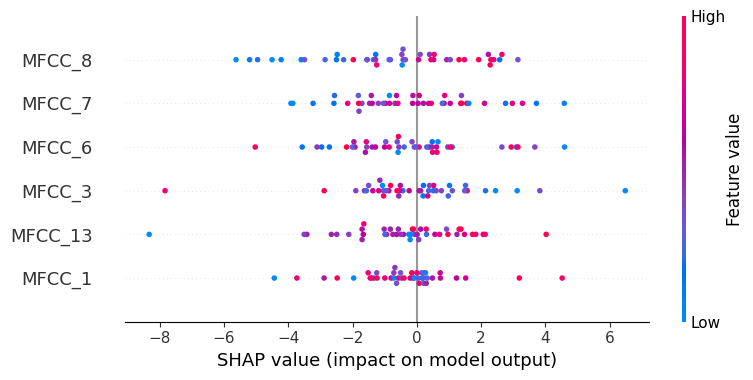

📊 SHAP summary plotted.


In [9]:
import os
import re
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import lime
import lime.lime_tabular
import shap
import warnings
warnings.filterwarnings("ignore")

# === Setup ===
audio_dir = "./"
output_excel = os.path.join(audio_dir, "combined_mfcc_correlation.xlsx")
output_heatmap = os.path.join(audio_dir, "overall_mfcc_correlation_heatmap.png")

# === Step 1: Locate audio files ===
pattern = re.compile(r'^2\d+s\d+\.mp3$')
audio_files = [f for f in glob(os.path.join(audio_dir, "*.mp3")) if pattern.match(os.path.basename(f))]
print(f"🎯 Found {len(audio_files)} matching audio files.")

# === Step 2: Extract MFCCs ===
mfcc_features = []
labels = []

for path in audio_files:
    try:
        base = os.path.basename(path)
        label = int(re.findall(r's(\d+)', base)[0])
        y, sr = librosa.load(path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = mfcc.mean(axis=1)  # 13-D vector
        mfcc_features.append(mfcc_mean)
        labels.append(label)
        print(f"🔍 Processed {base}")
    except Exception as e:
        print(f"❌ Failed {base}: {e}")

# === Step 3: Create DataFrame ===
if not mfcc_features:
    print("🚫 No valid features extracted.")
    exit()

X = pd.DataFrame(mfcc_features, columns=[f"MFCC_{i+1}" for i in range(13)])
y = pd.Series(labels, name="Label")

# === Save correlation matrix & heatmap ===
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("MFCC Correlation Matrix")
plt.tight_layout()
plt.savefig(output_heatmap)
plt.close()
print(f"✅ Heatmap saved to: {output_heatmap}")

with pd.ExcelWriter(output_excel, engine="xlsxwriter") as writer:
    X.to_excel(writer, sheet_name="MFCC_Features", index=False)
    corr_matrix.to_excel(writer, sheet_name="Correlation")

print(f"📁 Excel saved to: {output_excel}")

# === Step 4: Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate(desc, X_train, X_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ {desc} Accuracy: {acc:.4f}")
    return model

# === A2: PCA 99% ===
pca_99 = PCA(n_components=0.99)
X_pca_99_train = pca_99.fit_transform(X_train)
X_pca_99_test = pca_99.transform(X_test)
evaluate("PCA 99%", X_pca_99_train, X_pca_99_test)

# === A3: PCA 95% ===
pca_95 = PCA(n_components=0.95)
X_pca_95_train = pca_95.fit_transform(X_train)
X_pca_95_test = pca_95.transform(X_test)
evaluate("PCA 95%", X_pca_95_train, X_pca_95_test)

# === A4: Sequential Feature Selection (SFS) ===
sfs_selector = SequentialFeatureSelector(
    RandomForestClassifier(n_estimators=100),
    n_features_to_select=6,
    direction="forward",
    cv=5,
    scoring="accuracy"
)
sfs_selector.fit(X_train, y_train)

selected_features = X.columns[sfs_selector.get_support()].tolist()
X_sfs_train = X_train[selected_features]
X_sfs_test = X_test[selected_features]

model_sfs = evaluate("SFS (6 features)", X_sfs_train, X_sfs_test)

# === A5: Explainability ===
print("🧠 Running LIME and SHAP explainability...")

# LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_sfs_train.values,
    feature_names=selected_features,
    class_names=[str(c) for c in sorted(y.unique())],
    mode='classification'
)
lime_exp = explainer_lime.explain_instance(
    X_sfs_test.iloc[0].values,
    model_sfs.predict_proba
)
lime_exp.save_to_file("lime_explanation.html")
print("📄 LIME explanation saved to lime_explanation.html")

# SHAP using new Explainer (not TreeExplainer to avoid indexing issues)
shap_explainer = shap.Explainer(model_sfs.predict, X_sfs_train.values)
shap_values = shap_explainer(X_sfs_test.values)

shap.summary_plot(shap_values, features=X_sfs_test.values, feature_names=selected_features)
print("📊 SHAP summary plotted.")
